# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import os
import itertools

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.0017723115213727032


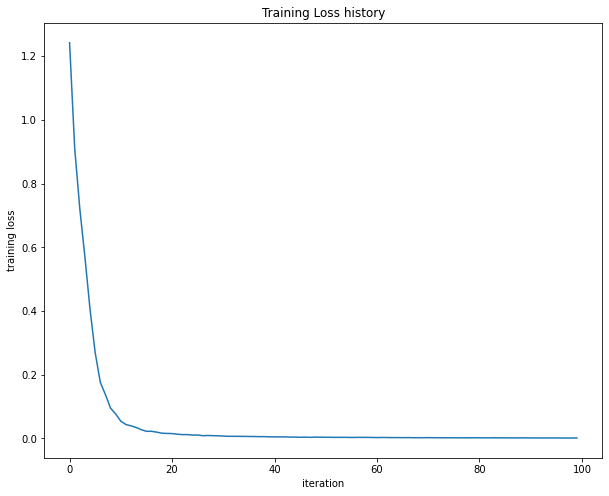

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [27]:
digits = load_digits()

In [8]:
keras_use = False
if keras_use==True:
    from keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(x_test.shape[0], 784)
    x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
    x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
    input_size = 785
    hidden_size = 50
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    
    stats = net.train(x_train, y_train, x_test, y_test,
                num_epochs=10, batch_size=1024,
                learning_rate=7.5e-4, learning_rate_decay=0.95,
                reg=10, verbose=True)
    
    val_acc = (net.predict(x_test) == y_test).mean()
    print('Validation accuracy: ', val_acc)

In [28]:
def train_val_test(datasets, size=(0.6, 0.1), shuffle=True):
    if shuffle:
        index = np.random.permutation(datasets.data.shape[0])
        datasets.data, datasets.target = datasets.data[index], datasets.target[index] 
    train, val = np.round(datasets.data.shape[0]*np.array(size))
    train, val = int(train), int(val)
    X_train, Y_train = datasets.data[:train], datasets.target[:train]
    X_val, Y_val = datasets.data[train:train+val], datasets.target[train:train+val]
    X_test, Y_test = datasets.data[train+val:], datasets.target[train+val:]
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [29]:
X_train, Y_train,  X_val, Y_val, X_test, Y_test = train_val_test(digits, shuffle=True)

[0.00000000e+00 2.83858998e-01 5.13729128e+00 1.17077922e+01
 1.18246753e+01 5.85157699e+00 1.44526902e+00 1.41001855e-01
 6.49350649e-03 1.92764378e+00]


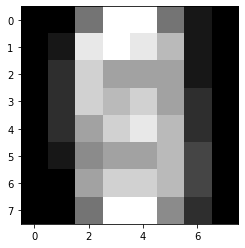

(1078, 65) (180, 65) (539, 65)


In [30]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow((mean_image.reshape((8,8))).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

In [31]:
# норм параметры
input_size = 65
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, Y_train, X_val, Y_val,
            num_iters=1400, batch_size=128,
            learning_rate=7.5e-2, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

val_acc = (net.predict(X_val) == Y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 100 / 1400: loss 0.834692, train 0.867188, val 0.866667
iteration 200 / 1400: loss 0.700774, train 0.968750, val 0.950000
iteration 300 / 1400: loss 0.718770, train 0.968750, val 0.961111
iteration 400 / 1400: loss 0.688114, train 0.984375, val 0.955556
iteration 500 / 1400: loss 0.701422, train 0.976562, val 0.950000
iteration 600 / 1400: loss 0.673952, train 0.968750, val 0.961111
iteration 700 / 1400: loss 0.704015, train 0.968750, val 0.955556
iteration 800 / 1400: loss 0.732659, train 0.953125, val 0.966667
iteration 900 / 1400: loss 0.679853, train 0.992188, val 0.966667
iteration 1000 / 1400: loss 0.697602, train 0.984375, val 0.966667
iteration 1100 / 1400: loss 0.685314, train 0.976562, val 0.961111
iteration 1200 / 1400: loss 0.681749, train 0.976562, val 0.966667
iteration 1300 / 1400: loss 0.671334, train 0.992188, val 0.966667
iteration 1400 / 1400: loss 0.637415, train 0.992188, val 0.961111
Validation accuracy:  0.9611111111111111


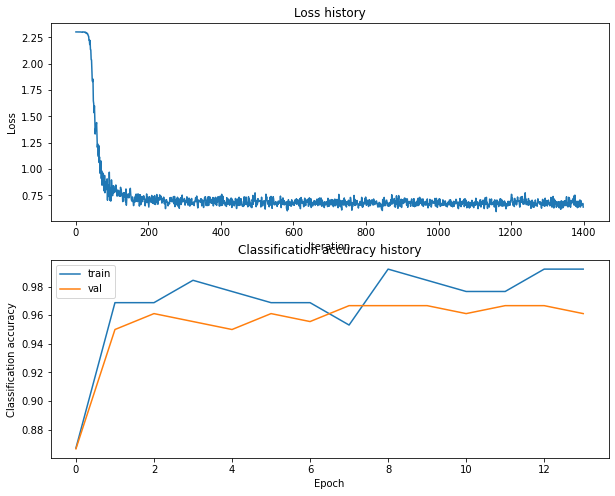

In [32]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

iteration 100 / 1000: loss 2.302588, train 0.120000, val 0.083333
iteration 200 / 1000: loss 2.302567, train 0.165000, val 0.083333
iteration 300 / 1000: loss 2.302578, train 0.100000, val 0.083333
iteration 400 / 1000: loss 2.302571, train 0.110000, val 0.083333
iteration 500 / 1000: loss 2.302581, train 0.075000, val 0.083333
iteration 600 / 1000: loss 2.302575, train 0.105000, val 0.083333
iteration 700 / 1000: loss 2.302580, train 0.115000, val 0.083333
iteration 800 / 1000: loss 2.302609, train 0.105000, val 0.083333
iteration 900 / 1000: loss 2.302552, train 0.110000, val 0.083333
iteration 1000 / 1000: loss 2.302565, train 0.115000, val 0.083333
Validation accuracy:  0.08333333333333333


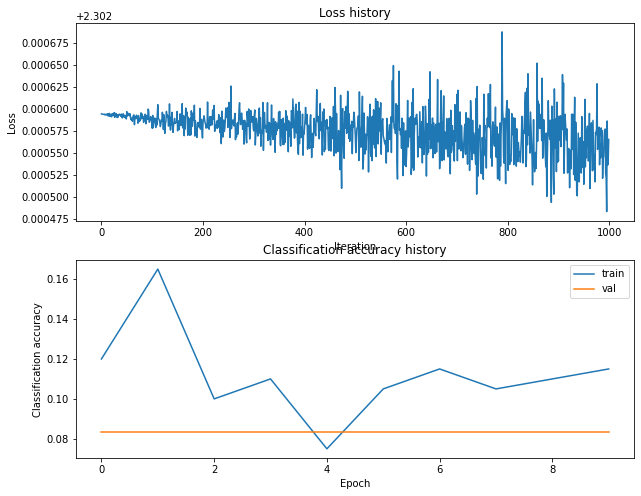

In [33]:
# по умолчанию в ноутбуке, результат не понравится
input_size = 65
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, Y_train, X_val, Y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == Y_val).mean()
print('Validation accuracy: ', val_acc)
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

In [34]:
# поиск гиперпараметров(Кроме количество нейронов в слое)
def search_hyper(net, params, info=False):
    best_score = 0.0
    best_loss = float(np.inf)
    best_params = {}
    grid = list(itertools.product(*params.values()))
    print(f"Размер сетки для поиска {len(grid)}")
    for param in grid:
        new_param = {k:v for k, v in list(zip(params.keys(), param))}
        #net = TwoLayerNet(input_size, hidden_size, num_classes)
        stats = net.train(X_train, Y_train, X_val, Y_val, learning_rate_decay=0.95, verbose=False,  **new_param)
        val_acc = (net.predict(X_val) == Y_val).mean()
        if info:
            print(new_param)
            print(val_acc)
        if val_acc > best_score:
            best_score = val_acc
            best_param = new_param
            best_model = net
    return best_score, best_param, best_model
        

In [35]:
params = {
    "num_iters":[30, 500, 900],
    "learning_rate": [7.5e-2, 1e-2,],
    "reg":[1, 0.5, 0.05],
    "batch_size": [32, 512, 765],
}

In [36]:
net = TwoLayerNet(input_size, hidden_size, num_classes)
be, par, me = search_hyper(net, params, info=True)

Размер сетки для поиска 54
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 1, 'batch_size': 32}
0.10555555555555556
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 1, 'batch_size': 512}
0.08333333333333333
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 1, 'batch_size': 765}
0.08333333333333333
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 0.5, 'batch_size': 32}
0.20555555555555555
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 0.5, 'batch_size': 512}
0.4666666666666667
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 0.5, 'batch_size': 765}
0.5555555555555556
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 0.05, 'batch_size': 32}
0.7055555555555556
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 0.05, 'batch_size': 512}
0.8888888888888888
{'num_iters': 30, 'learning_rate': 0.075, 'reg': 0.05, 'batch_size': 765}
0.9555555555555556
{'num_iters': 30, 'learning_rate': 0.01, 'reg': 1, 'batch_size': 32}
0.9555555555555556
{'num_iters': 30, 'learning_rate': 0.01, 'reg': 1, 'batch_s

In [37]:
be

0.9777777777777777

In [41]:
par

{'num_iters': 500, 'learning_rate': 0.075, 'reg': 0.05, 'batch_size': 512}

In [38]:
test_acc = (me.predict(X_test) == Y_test).mean()

In [39]:
test_acc

0.9591836734693877

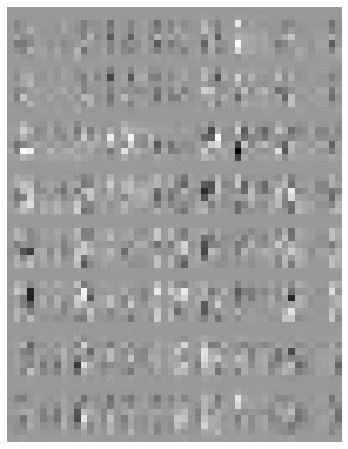

In [40]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    plt.imshow(W1)
    #plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 

Гиперпараметры по умолчанию не дают сойтись и выдать хоть какое-нибудь решение, поэтому нейронка выдает лишь один класс. С изменением темпа обучения, количества итераций и параметра регуляризации удалось дойти до приемлимых результатов. Главным параметром оказался темп обучения, от которого как раз и стала зависеть работа нейронной сети(слишком маленький темп на неработающей сети)
Возможно улучшить работу сети введя параметр раннего останова, чтобы предотвратить переробучение
Еще один вывод - лучше перемешивать данные.
Максимальный результат 97.7 на валидации, 95.9 на тесте